# **Projet de MAP568**
**1, Introduction**

**2 Modèle SEIR**

2.1 Les compartiments

2.2 L’évolution de l’épidémie

$\frac{dS}{dt}=-\tau SI^-$

$\frac{dI^-}{dt}=\tau S I^--\lambda_1 I^--(\gamma_{IR}+\gamma_{IH}+\gamma_{IU})I^+$

$\frac{dR^-}{dt}=\gamma_{IR}I^--\lambda_2 R^-$

$\frac{dR^{+^I}}{dt}=\gamma_{IR}I^++\lambda_2 R^-$

$\frac{dH}{dt}=\gamma_{IH}(I^-+I^+)-(\gamma_{HR}+\gamma_{HD}+\gamma_{HU})H$

$\frac{dU}{dt}=\gamma_{IU}(I^-+I^+)+\gamma_{HU}H-(\gamma_{UR}+\gamma_{UD})U$

$\frac{dR^{+^H}}{dt}=\gamma_{HR}H+\gamma_{UR}U$

$\frac{dD}{dt}=\gamma_{UD}U+\gamma_{HD}H$

**2.3 Les paramètres**

$\tau(t)=\tau_0 exp(-\mu max(t-N,0))$

 $p_a$: la probabilité pour un individu infecté d’être asymptomatique

  $p_{IH}$ la probabilité pour un individu infecté
symptomatique de devoir être hospitalisé (et passer en compartiment H)


$p_{IU}$ la probabilité pour un individu infecté symptomatique de devoir être admis directement en soins intensifs (et passer en compartiment U).

 $N_I$ le
nombre moyen de jours pasés dans les compartiments $I^−$ ou $I^+$.

$\gamma_{IR}=\frac{p_a+(1-p_a)(1-p_{IH}-p_{IU})}{N_I}$

$\gamma_{IH}=\frac{(1-p_a)p_{IH}}{N_I}$

$\gamma_{IU}=\frac{(1-p_a)p_{IU}}{N_1}$

$\gamma_{HD}=\frac{p_{HD}}{N_H}$

$\gamma_{HU}=\frac{p_{HU}}{N_H}$

$\gamma_{HR}=\frac{1-p_{HD}-p_{HU}}{N_H}$

$\gamma_{UD}=\frac{p_{UD}}{N_U}$

$\gamma_{UR}=\frac{1-p_{UD}}{N_U}$

$\tau_0=\frac{R_0(\lambda_1+\gamma_{IR}+\gamma_{IH}+\gamma_{IU})}{S_0}$

**3 Propagation d’incertitudes**


3.1 Incertitudes en entrée


3.2 Incertitudes en sortie

*Question 1:*




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
from scipy.optimize import minimize

In [ ]:
No=1 #Le nombre d'échantillons
M=200 #Le temps considéré
S0=67 *10**(6)
min = np.array([0.4,0.05,0.01,0.1,0.1,0.2,8,15,10,2.9,0.01,1,10**(-4)])
max = np.array([0.9,0.2,0.04,0.2,0.2,0.4,12,25,20,3.4,0.08,100,10**(-3)])
pa,pIH,pIU,pHD,pHU,pUD,N1,NH,NU,R0,mu,I0,lambda1=np.transpose(np.random.uniform(min,max,size=(No,13)))
lambda2=0

#dates séparément
t0=np.random.choice(a=np.arange(1,32),p=None,size=No)#début épidémie
N=np.random.choice(a=np.arange(32,52),p=None,size=No) #date d'effet des mesures

#version dates : 
min_t0 = pd.to_datetime("25/01/2020")
max_t0 = pd.to_datetime("24/02/2020")
range_t0 = pd.date_range(min_t0,max_t0)

min_N = pd.to_datetime("24/02/2020")
max_N = pd.to_datetime("15/03/2020")
range_N = pd.date_range(min_N,max_N)

size_t0 = len(range_t0)
size_N = len(range_N)
t0 = []
N= []
N_days = [] #nombre de jours entre début de l'épidémie et début de l'efficacité des mesures
for i in range(No):
    t0.append(range_t0[np.random.randint(0,size_t0)])
    N.append(range_N[np.random.randint(0,size_N)])
    N_days.append(np.int((N[i]-t0[i])/np.timedelta64(1,'D')))

In [ ]:
gamma_IR=(pa+(1-pa)*(1-pIH-pIU))/N1
gamma_IH=(1-pa)*pIH/N1
gamma_IU=(1-pa)*pIU/N1
gamma_HD=pHD/NH
gamma_HU=pHU/NH
gamma_HR=(1-pHD-pHU)/NH
gamma_UD=pUD/NU
gamma_UR=(1-pUD)/NU
tau0=R0*(lambda1+gamma_IR+gamma_IH+gamma_IU)/S0
t=np.arange(0,M)
tau=np.ones((No,M))
for i in range(No):
    tau[i,:]=tau0[i]*np.exp(-mu[i]*np.maximum(t-N_days[i],0))

In [ ]:
S=S0*np.ones((No,M))
I=np.array([I0[i]*np.ones((No,M))[i] for i in range(No)])
I_plus=np.zeros((No,M))
R_=np.zeros((No,M))
R_plus=np.zeros((No,M))
H=np.zeros((No,M))
U=np.zeros((No,M))
R_plusH=np.zeros((No,M))
D=np.zeros((No,M))
DR=np.zeros((No,M))

In [ ]:
for n in range(1,M):
  S[:,n]=(1-tau[:,n-1]*I[:,n-1])*S[:,n-1]
  I[:,n]=(1+tau[:,n-1]*S[:,n-1]-lambda1-(gamma_IR+gamma_IH+gamma_IU))*I[:,n-1]
  I_plus[:,n]=lambda1*I[:,n-1]-(-1+gamma_IR+gamma_IH+gamma_IU)*I_plus[:,n-1]
  R_[:,n]=gamma_IR*I[:,n-1]+(1-lambda2)*R_[:,n-1]
  R_plus[:,n]=gamma_IR*I_plus[:,n-1]+R_plus[:,n-1]+lambda2*R_[:,n-1]
  H[:,n]=gamma_IH*(I[:,n-1]+I_plus[:,n-1])-(-1+gamma_HR+gamma_HD+gamma_HU)*H[:,n-1]
  U[:,n]=gamma_IU*(I[:,n-1]+I_plus[:,n-1])-(-1+gamma_UR+gamma_UD)*U[:,n-1]+gamma_HU*H[:,n-1]
  R_plusH[:,n]=gamma_HR*H[:,n-1]+gamma_UR*U[:,n-1]+R_plusH[:,n-1]
  D[:,n]=gamma_UD*U[:,n-1]+gamma_HD*H[:,n-1]+D[:,n-1]
  DR[:,n]=(lambda1+gamma_IH+gamma_IU)*I[:,n-1]

934861.6663634722

le début de l'épidémie a lieu le 2020-02-11
Le nombre maximal de patients présents en soins intensif est  30647  personnes et ce maximum est atteint le 2020-05-22 soit 101 jours après le début


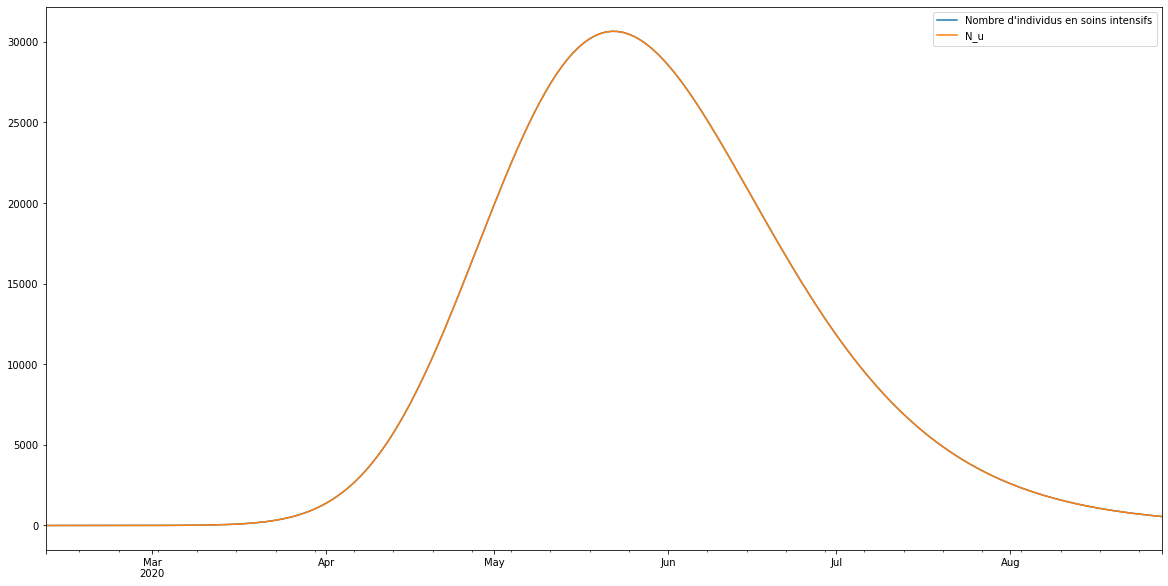

In [ ]:
chose_sim =999 #for plots
start_date = t0[chose_sim]
range_date = pd.date_range(start = start_date,periods=M,freq="D")
df_u = pd.DataFrame(data = U[chose_sim],index = range_date,columns=["Nombre d'individus en soins intensifs"])
df_u["N_u"]=df_u["Nombre d'individus en soins intensifs"] #shorter name
fig = df_u.plot(figsize=[20,10])
max_u = np.int(df_u["N_u"].max())
date_max_u = df_u["N_u"].idxmax()
N_jours= np.int((date_max_u-df_u.index[0])/np.timedelta64(1,'D'))
print("le début de l'épidémie a lieu le",df_u.index[0].date())
print("Le nombre maximal de patients présents en soins intensif est ", max_u," personnes et ce maximum est atteint le", date_max_u.date(), "soit", N_jours, "jours après le début")

In [ ]:
print("Le nombre maximal de patients présents en soins intensif est ", int(np.max(U[1]))," personnes")
temps=np.where(U[1]==np.max(U[1]))[0][0]#jours de pic de l'épidémie
if(t0[0]<=24):
  print("La date de début de l'épidémie:",t0[0], "/02")
  if(t0[0]+temps<=29):
    print("La date de pic de l'épidémie:",t0[0]+temps, "/02")
  if(t0[0]+temps>29 and t0[0]+temps<=60):
    print("La date de pic de l'épidémie:",60-t0[0]-temps, "/03")
  if(t0[0]+temps>60 and t0[0]+temps<=91):
    print("La date de pic de l'épidémie:",91-t0[0]-temps, "/04")
  if(t0[0]+temps>91 and t0[0]+temps<=121):
    print("La date de pic de l'épidémie:",121-t0[0]-temps, "/05")
  if(t0[0]+temps>121 and t0[0]+temps<=150):
    print("La date de pic de l'épidémie:",150-t0[0]-temps, "/06")

else:
  print("La date de début de l'épidémie:",t0[0], "/01")
  if(t0[0]+temps<=31):
    print("La date de pic de l'épidémie:",t0[0]+temps, "/01")
  if(t0[0]+temps>31 and t0[0]+temps<=60):
    print("La date de pic de l'épidémie:",60-t0[0]-temps, "/02")
  if(t0[0]+temps>60 and t0[0]+temps<=91):
    print("La date de pic de l'épidémie:",91-t0[0]-temps, "/03")
  if(t0[0]+temps>91 and t0[0]+temps<=121):
    print("La date de pic de l'épidémie:",121-t0[0]-temps, "/04")
  if(t0[0]+temps>121 and t0[0]+temps<=150):
    print("La date de pic de l'épidémie:",150-t0[0]-temps, "/05")

print("Après", temps, "jours depuis le début, l’épidémie atteint son pic")


Le nombre maximal de patients présents en soins intensif est  21604  personnes


TypeError: ignored

Question 2,

In [ ]:
Max=np.max(U,axis=1)
print('Moyenne du nombre maximal de patients présents en soins intensifs:',int(np.mean(Max)), 'personnes')

Moyenne du nombre maximal de patients présents en soins intensifs: 21906 personnes


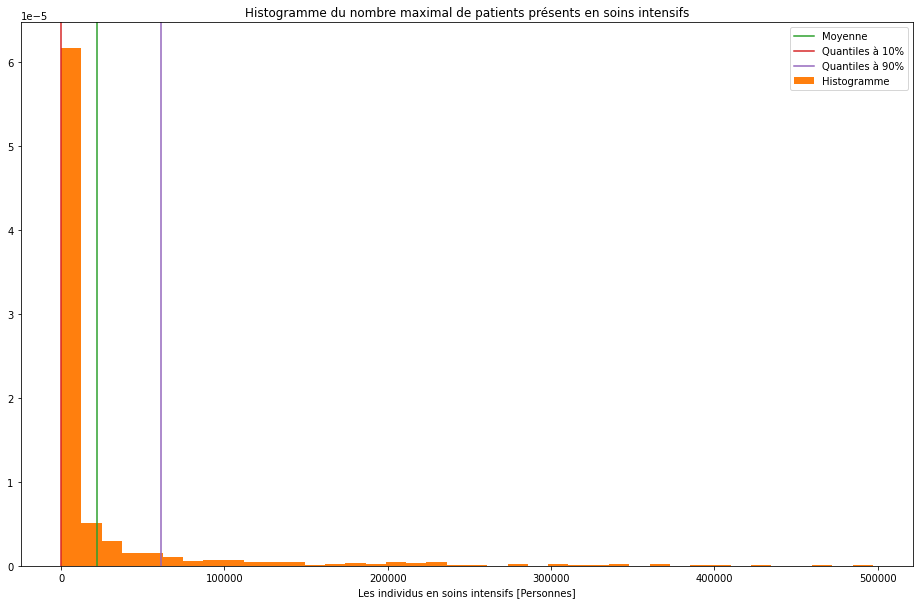

In [ ]:
plt.figure(figsize=(16,10))
plt.hist(Max,bins=40,density=True,color='C1',label='Histogramme')
plt.xlabel("Les individus en soins intensifs [Personnes]")
plt.title('Histogramme du nombre maximal de patients présents en soins intensifs')
plt.axvline(np.mean(Max),color='C2',label='Moyenne')
plt.axvline(np.quantile(Max,0.1),color='C3',label='Quantiles à 10%')
plt.axvline(np.quantile(Max,0.9),color='C4',label='Quantiles à 90%')
plt.legend()
plt.show()

**5 Calibration**

Question 6:

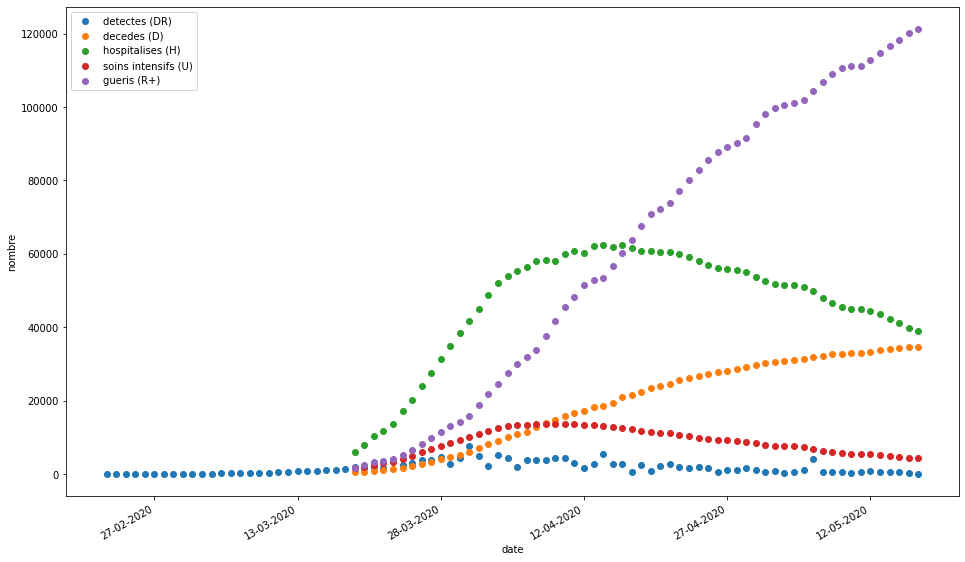

In [ ]:
df = pd.read_csv('data.csv')
data_H = np.array([np.sum(pd.read_csv('hosp.csv').iloc[302*i:302*(i+1)]['2'])for i in range(60)])
data_D = np.array([np.sum(pd.read_csv('decedes.csv').iloc[302*i:302*(i+1)]['0'])for i in range(60)])
data_DR=np.array([df['nbre'][i+1]-df['nbre'][i] for i in range(df.index[df['date']=='16/05'][0]+1)])
data_U = np.array([np.sum(pd.read_csv('reanimation.csv').iloc[302*i:302*(i+1)]['0'])for i in range(60)])
data_R = np.array([np.sum(pd.read_csv('rad.csv').iloc[302*i:302*(i+1)]['Unnamed: 0'])for i in range(60)])
date = []
date1=[]
d = dt.datetime(2020, 2, 21)
for i in range(86):
        d = d+dt.timedelta(days=1)
        date.append(d)
d = dt.datetime(2020, 3, 18)
for i in range(60):
        d = d+dt.timedelta(days=1)
        date1.append(d)
plt.figure(figsize=(16,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.scatter(date,data_DR,label='detectes (DR)')
plt.scatter(date1,data_D,label='decedes (D)')
plt.scatter(date1,data_H,label='hospitalises (H)')
plt.scatter(date1,data_intensif,label='soins intensifs (U)')
plt.scatter(date1,data_R,label='gueris (R+)')
plt.xlabel('date')
plt.ylabel('nombre')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()


**5.1 Calibration d´eterministe**

Question 7

In [ ]:
min_s = pd.to_datetime("24/02/2020")
max_s = pd.to_datetime("31/03/2020")
range_s = pd.date_range(min_s,max_s)
min_t = pd.to_datetime("18/03/2020")
max_t = pd.to_datetime("31/03/2020")
range_t = pd.date_range(min_t,max_t)
min_t1 = pd.to_datetime("24/02/2020")
max_t1 = pd.to_datetime("17/03/2020")
range_t1 = pd.date_range(min_t1,max_t1)
size_s = len(range_s)
size_t = len(range_t)
size_t1 = len(range_t1)
t0 = []
N= []
N_days = [] #nombre de jours entre début de l'épidémie et début de l'efficacité des mesures
for i in range(1):
    t0.append(range_t0[np.random.randint(0,size_t0)])
    N.append(range_N[np.random.randint(0,size_N)])
    N_days.append(np.int((N[i]-t0[i])/np.timedelta64(1,'D')))
def gamma_IR(x):
  return (x[0]+(1-x[0])*(1-x[1]-x[2]))/x[6]
def gamma_IH(x):
  return (1-x[0])*x[1]/x[6]
def gamma_IU(x):
  return (1-x[0])*x[2]/x[6]
def gamma_HD(x):
  return x[3]/x[7]
def gamma_HU(x):
  return x[4]/x[7]
def gamma_HR(x):
  return (1-x[3]-x[4])/x[7]
def gamma_UD(x):
  return x[5]/x[8]
def gamma_UR(x):
  return (1-x[5])/x[7]
def tau0(x):
  return x[9]*(x[14]+gamma_IR(x)+gamma_IH(x)+gamma_IU(x))/S0
def tau(x):
  t=np.arange(M)
  return tau0(x)*np.exp(-x[10]*np.maximum(t-x[11],0))

In [ ]:
def predict_data(x):
  S=S0*np.ones(M)
  I=x[13]*np.ones(M)
  I_plus=np.zeros(M)
  R_=np.zeros(M)
  R_plus=np.zeros(M)
  H=np.zeros(M)
  U=np.zeros(M)
  R_plusH=np.zeros(M)
  D=np.zeros(M)
  DR=np.zeros(M)
  for n in range(1,M):
    S[n]=(1-tau(x)[n-1]*I[n-1])*S[n-1]
    I[n]=(1+tau(x)[n-1]*S[n-1]-x[14]-(gamma_IR(x)+gamma_IH(x)+gamma_IU(x)))*I[n-1]
    I_plus[n]=x[14]*I[n-1]-(-1+gamma_IR(x)+gamma_IH(x)+gamma_IU(x))*I_plus[n-1]
    R_[n]=gamma_IR(x)*I[n-1]+(1-0)*R_[n-1]
    R_plus[n]=gamma_IR(x)*I_plus[n-1]+R_plus[n-1]+0*R_[n-1]
    H[n]=gamma_IH(x)*(I[n-1]+I_plus[n-1])-(-1+gamma_HR(x)+gamma_HD(x)+gamma_HU(x))*H[n-1]
    U[n]=gamma_IU(x)*(I[n-1]+I_plus[n-1])-(-1+gamma_UR(x)+gamma_UD(x))*U[n-1]+gamma_HU(x)*H[n-1]
    R_plusH[n]=gamma_HR(x)*H[n-1]+gamma_UR(x)*U[n-1]+R_plusH[n-1]
    D[n]=gamma_UD(x)*U[n-1]+gamma_HD(x)*H[n-1]+D[n-1]
    DR[n]=(x[14]+gamma_IH(x)+gamma_IU(x))*I[n-1]
  return DR[:size_s],H[size_t1:size_s],U[size_t1:size_s],D[size_t1:size_s],R_[size_t1:size_s]
  

In [ ]:
def fDR(x):
  return (predict_data(x)[0]-data_DR[:size_s])/np.sqrt(predict_data(x)[0])

def fH(x):
  return (predict_data(x)[1]-data_H[:size_t])/np.sqrt(predict_data(x)[1])

def fU(x):
  return (predict_data(x)[2]-data_U[:size_t])/np.sqrt(predict_data(x)[2])

def fD(x):
  return (predict_data(x)[3]-data_D[:size_t])/np.sqrt(predict_data(x)[3])

def fR(x):
  return (predict_data(x)[4]-data_U[:size_t])/np.sqrt(predict_data(x)[4])


In [ ]:
def epsilon(x):
  return np.sum(fDR(x)**2)+np.sum(fH(x)**2)+np.sum(fU(x)**2)+np.sum(fD(x)**2)+np.sum(fR(x)**2)
t0=np.random.choice(a=np.arange(1,32),p=None,size=1)#début épidémie
N=np.random.choice(a=np.arange(32,52),p=None,size=1) #date d'effet des mesures
y=np.random.uniform(min,max,size=13)
x0=np.insert(y,[10,10],[int(N),int(t0)])
min1=np.insert(min,[11,11],[32,1])
max1=np.insert(max,[11,11],[52,32])
bounds=np.transpose(np.array([min1,max1]))
res = minimize(epsilon,x0,options={'xtol': 1e-8, 'disp': True})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: OptimizeWarning: Unknown solver options: xtol
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


         Current function value: nan
         Iterations: 0
         Function evaluations: 17
         Gradient evaluations: 1


**5.2 Calibration bayésienne**

Question 8:

La vraisemblance:

$p(data,\sigma|x^*)=p(data|x^*,\sigma)*\pi(\sigma)=\frac{1}{(2\pi)^{\frac{n_{DR}}{2}+2n_H} .\sigma_{DR}^{n_{DR}+1}.\sigma_{H}^{n_{H}}.\sigma_{U}^{n_{H}+1}.\sigma_{D}^{n_{H}+1}.\sigma_{R}^{n_{H}+1}} exp\{-0.5\sum_{i=1}^{n_{DR}}\frac{f_{DR}(x^*,s_i)^2}{\sigma_{DR}^2}-0.5\sum_{i=1}^{n_H} \frac{f_{H}(x^*,s_i)^2}{\sigma_{H}^2}+\frac{f_{U}(x^*,s_i)^2}{\sigma_{U}^2}+\frac{f_{D}(x^*,s_i)^2}{\sigma_{D}^2}+\frac{f_{R}(x^*,s_i)^2}{\sigma_{R}^2}\}$

$\Rightarrow \begin{align}
    \begin{cases}
        \frac{\partial{log(p(data,\sigma|x^*))}}{\sigma_{DR}} &= -(n_{DR}+1)\frac{1}{\sigma_{DR}*}+\frac{1}{\sigma_{DR}*^3}\sum_{i=1}^{n_{DR}}f_{DR}(x,s_i)&=&0 \\
        \frac{\partial{log(p(data,\sigma|x^*))}}{\sigma_{C}} &= -(n_{C}+1)\frac{1}{\sigma_{C}*}+\frac{1}{\sigma_{C}*^3}\sum_{i=1}^{n_{H}}f_C(x,s_i)&=&0
    \end{cases}
\end{align}$

$\Rightarrow \begin{align}
    \begin{cases}
        (\sigma*_{DR})^2&=&\frac{\sum_{i=1}^{n_{DR}}f_{DR}(x,s_i)}{n_{DR}+1}\\
        (\sigma*_{C})^2&=&\frac{\sum_{i=1}^{n_{C}}f_{C}(x,s_i)}{n_{H}+1}
    \end{cases}
\end{align}$

Avec $C\in\{H,U,D,R\}$




Question 9:

Le cadre de l’approche full-bayésienne:

$p(x|data)=\frac{p(x,data)}{p(data)}=\frac{\sum_C p(x,data,\sigma_C)}{p(data)}=\frac{ p(data|x,\sigma)p_0(x)\sum_C \pi(\sigma_C)}{p(data)}$

Le cadre de l’approche plug-in:

$p(x|data)=\frac{p(x,data)}{p(data)}=\frac{ p(data|x,\sigma_C^*)p_0(x)}{p(data)}$

Question 10: